# Weekly assignment 1: exploratory data analysis

Introduction:
For this assignment, we are going to explore data from activity trackers. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip-on device. Popular applications include Steps (iPhone), Apple Watch, Fitbit and Jawbone. For a study in France, over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

First step: Importing liberaries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Second Step: Importing the data

In [4]:
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv("survey.csv")

# Data cleaning

First step: Two data sets are combined and 3 first rows are shown.

In [5]:
df = survey_data.merge(step_data, on = "id")
df = df.fillna(0)
df.head(3)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,3914.0,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0


Second step: inspecting the data.

In [6]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,...,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.000000,929.0
mean,465.000000,2.342304,2.530678,171.483315,72.677072,94.099031,2363.227126,3258.685684,2358.711518,3090.496233,...,756.442411,579.158235,508.418730,594.968784,380.274489,731.452099,704.926803,593.412271,533.223897,0.0
std,268.323499,1.226129,1.274491,10.681013,26.094307,849.309766,5148.525494,6056.212149,5130.559226,5197.950106,...,3174.031586,2562.608887,2343.635586,2876.641763,2353.715160,3233.101267,2769.277979,3139.909396,2296.391424,0.0
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,233.000000,1.000000,1.000000,165.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,465.000000,2.000000,2.000000,172.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,697.000000,3.000000,4.000000,179.000000,81.000000,0.000000,383.000000,4871.000000,2465.000000,5712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Columns: 337 entries, id to 13-5-2014
dtypes: float64(330), int64(3), object(4)
memory usage: 2.4+ MB


Third step: Creating the variable mean steps per participant and avarage of each participant.

In [8]:
mean_step = df.loc[:,"20-6-2013":"13-5-2014"].mean()
mean_step.index

meanstep = step_data.mean(numeric_only=True, axis=1)
df["avg"] = meanstep
df.head(5)

C:\Users\Markazi\AppData\Local\Temp\ipykernel_6096\4003243948.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mean_step = df.loc[:,"20-6-2013":"13-5-2014"].mean()


,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,avg
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10144.048193
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5652.756098
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,0.0,...,4364.0,0.0,0.0,0.0,6227.0,4567.0,2567.0,1129.0,0.0,8246.033557
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3460.380952
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5215.636364


Fourth step: Inspecting the data again for 3 rows.

In [9]:
df = df.fillna(0)

# Exploratory data analysis

An analysis of mean steps per participant:

1. Line plot

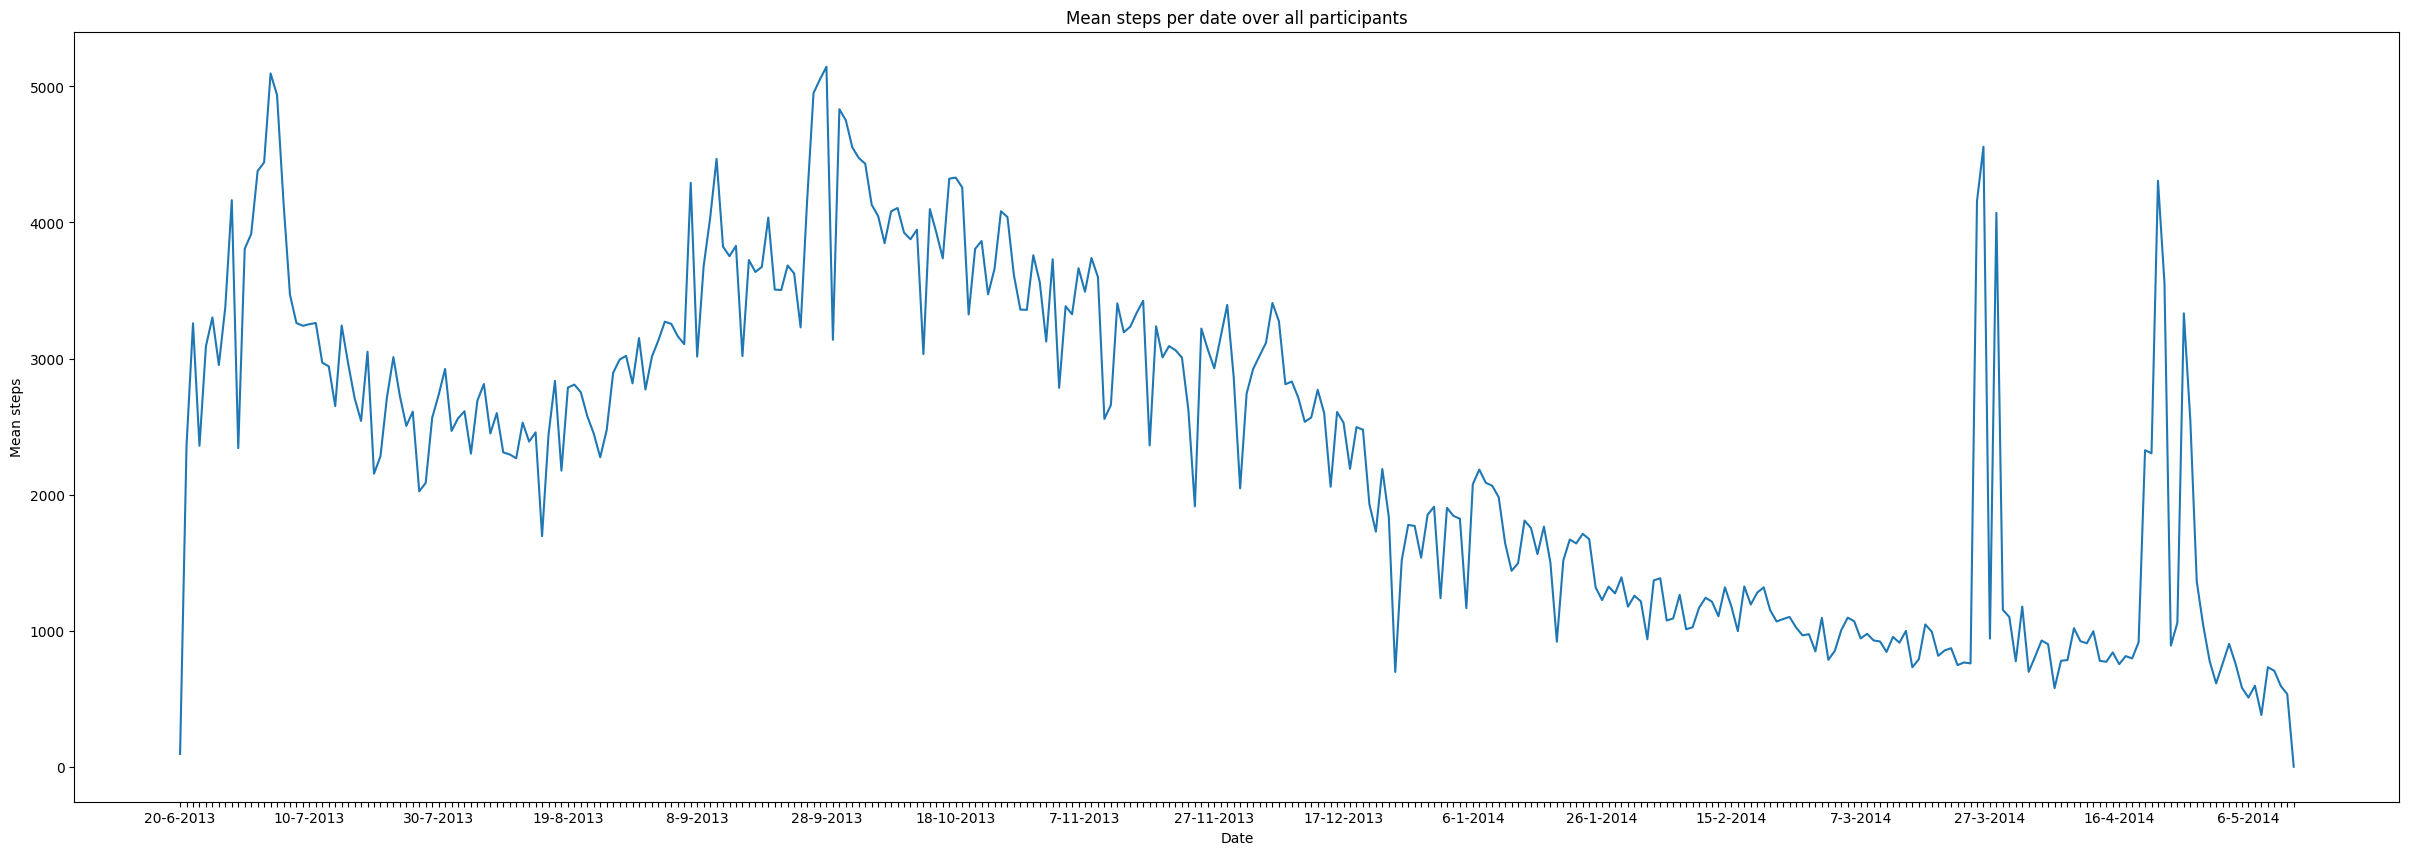

In [10]:
plt.figure(figsize=(30, 10))
plot = sns.lineplot(x=mean_step.index, y=mean_step) 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:
                label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") 
plt.xlabel("Date") 
plt.ylabel("Mean steps") 

plt.show()

The data is scattered around specific dates which can be due to good weather or just weekend. The data is highly flactuated but shows s decending trend which is more evident as we go through winter monthes. During March and April there are 4 climax points.

2. Summary statistics

In [11]:
print("Median: " + str(float(df[["avg"]].median())))
print('mode: ' + str(df[["avg"]].mode()["avg"][0]))
print("Mean: " + str(float(df[["avg"]].mean())))
print("Standard deviation: " + str(float(df[["avg"]].std())))
print("Variance: " + str(float(df[["avg"]].var())))

Median: 6078.955
mode: 18.0
Mean: 6810.28742555817
Standard deviation: 6474.655225040971
Variance: 41921160.28315035


# The relation of mean steps per participant with two categorical variables

Graph of the relation:

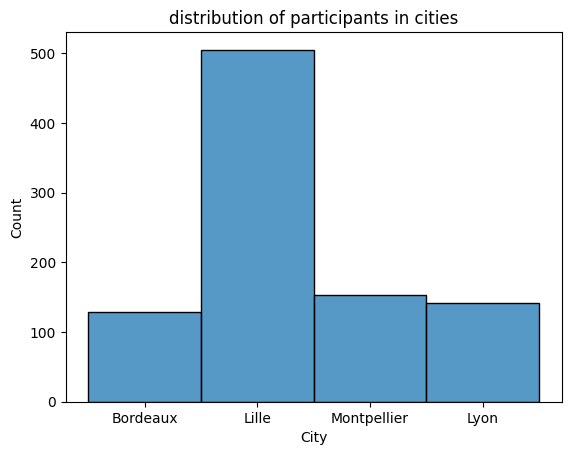

In [12]:
sns.histplot(df["city"])
plt.title("distribution of participants in cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.show()

Most of the participants are from Lile, while number of participants from other cities are quite the same.

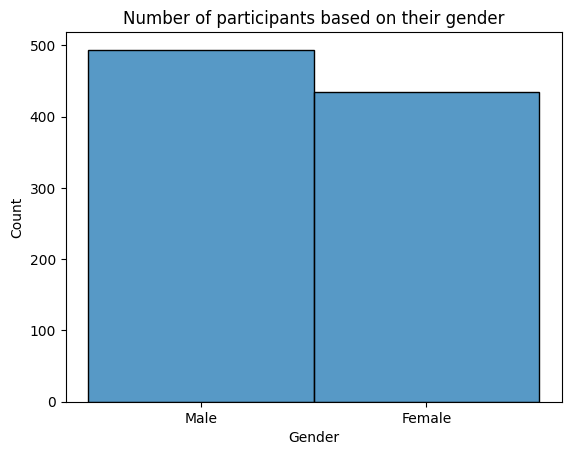

In [13]:
sns.histplot(df["gender"])
plt.title("Number of participants based on their gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

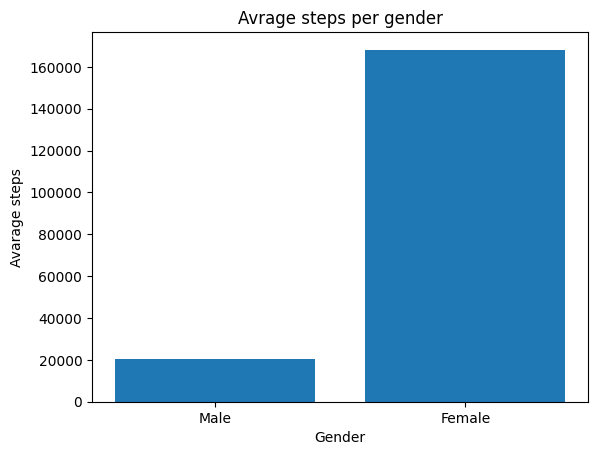

In [14]:
plt.bar(x=df["gender"] , height=df["avg"])
plt.title("Avrage steps per gender")
plt.xlabel("Gender")
plt.ylabel("Avarage steps")
plt.show()

While the number of female participants are slightly less than male participants, the second barchart illustrates that their performance is highly better. Female participants walked approximatly eight times more than male participants while being less in number.

# Exploratory data analysis

1. Make a scatterplot ans correlation matrix of the numerical variables:

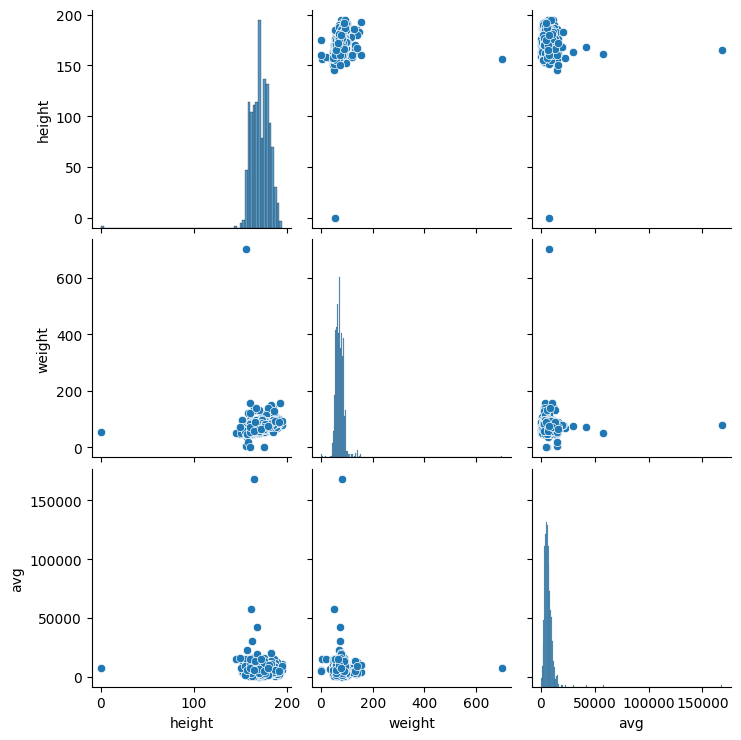

In [15]:
variables = df[["height", "weight", "avg"]]
sns.pairplot(variables)
plt.show()


2. Data cleaning:

In [16]:
df["height"].mask(df["height"].between(0, 140), inplace=True) 
df["weight"].mask(df["weight"].between(0, 35), inplace=True)
df["weight"].mask(df["weight"].between(200, 1000), inplace=True)
df["avg"].mask(df["avg"].between(75000, 300000), inplace=True) 

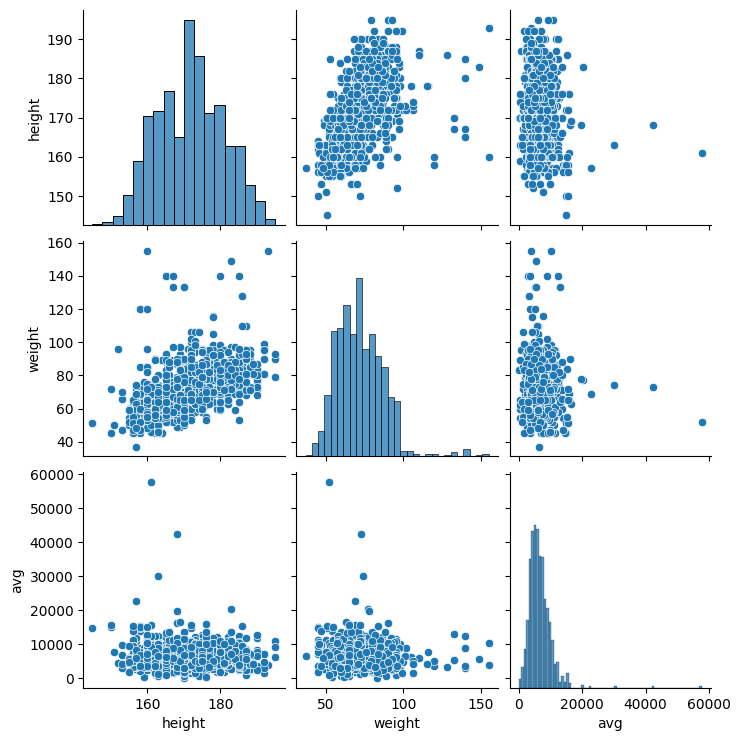

In [17]:
variables = df[["height", "weight", "avg"]]
sns.pairplot(variables)
plt.show()

The graph indicates that participants with who weigh less tend to walk more steps.

In [18]:
corr = df[["height", "weight", "avg"]].corr()
corr

,height,weight,avg
height,1.000000,0.510058,-0.090564
weight,0.510058,1.000000,-0.071209
avg,-0.090564,-0.071209,1.000000


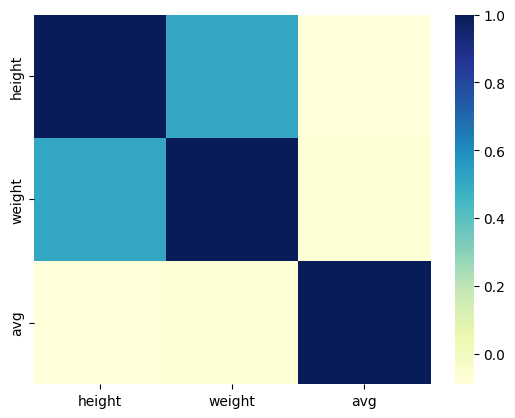

In [19]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu") 
plt.show()

The variables weight and heigth correspond to eachother while they have no corralation with avg.

# Predictive model

1. Explain linear regression in your own words:

The linear regression analysis predicts the value of a variable based on the value of another variable. 

In [28]:
df.dropna(subset=["weight"])

x = df[["weight"]] 
y = df["height"]
lm = LinearRegression()  # create object for the class
lm.fit(x, y)  # perform linear regression
b0 = lm.intercept_ #gets the intercept
b1 = lm.coef_[0] 

print(f"The regression line is equal to y = {b0:.3f} + {b1:.3f}X")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df['views_p'] = lm.predict(x)
df.head(10)